In [2]:
#import bibliotek
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# kosmetyczne komendy oraz import danych
sns.set_style('whitegrid')
url = 'https://raw.githubusercontent.com/wizzy83/colab/master/horse-colic.data'

df_pi = df = pd.read_table(url, sep='\s+', header=None, na_values='?')

In [4]:
df_pi.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,5.0,4.0,4.0,NaN,NaN,NaN,3.0,5.0,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,3.0,4.0,2.0,NaN,NaN,NaN,4.0,2.0,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,3.0,3.0,1.0,NaN,NaN,NaN,1.0,1.0,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,2.0,4.0,4.0,1.0,2.0,5.0,3.0,NaN,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2


In [5]:
df_pi.info()
df_pi.describe()

# 300 obserwacji, 28 kolumn, statystki opisowe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       299 non-null    float64
 1   1       300 non-null    int64  
 2   2       300 non-null    int64  
 3   3       240 non-null    float64
 4   4       276 non-null    float64
 5   5       242 non-null    float64
 6   6       244 non-null    float64
 7   7       231 non-null    float64
 8   8       253 non-null    float64
 9   9       268 non-null    float64
 10  10      245 non-null    float64
 11  11      256 non-null    float64
 12  12      244 non-null    float64
 13  13      196 non-null    float64
 14  14      194 non-null    float64
 15  15      53 non-null     float64
 16  16      198 non-null    float64
 17  17      182 non-null    float64
 18  18      271 non-null    float64
 19  19      267 non-null    float64
 20  20      135 non-null    float64
 21  21      102 non-null    float64
 22  22

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
count,299.000000,300.000000,3.000000e+02,240.000000,276.000000,242.000000,244.000000,231.000000,253.000000,268.000000,245.00000,256.000000,244.000000,196.000000,194.000000,53.000000,198.000000,182.000000,271.000000,267.000000,135.000000,102.000000,299.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,1.397993,1.640000,1.085889e+06,38.167917,71.913043,30.417355,2.348361,2.017316,2.853755,1.305970,2.95102,2.917969,2.266393,1.755102,1.582474,4.707547,2.757576,3.692308,46.295203,24.456929,2.037037,3.019608,1.551839,1.363333,3657.880000,90.226667,7.363333,1.670000
std,0.490305,2.173972,1.529801e+06,0.732289,28.630557,17.642231,1.045054,1.042428,1.620294,0.477629,1.30794,0.976744,1.065131,0.649437,0.805359,1.982311,1.251119,1.491725,10.419335,27.475009,0.804905,1.968567,0.737187,0.481763,5399.513513,649.569234,127.536674,0.470998
min,1.000000,1.000000,5.184760e+05,35.400000,30.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23.000000,3.300000,1.000000,0.100000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,5.289040e+05,37.800000,48.000000,18.500000,1.000000,1.000000,1.000000,1.000000,2.00000,3.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000,38.000000,6.500000,1.000000,2.000000,1.000000,1.000000,2111.750000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,5.303055e+05,38.200000,64.000000,24.500000,3.000000,2.000000,3.000000,1.000000,3.00000,3.000000,2.000000,2.000000,1.000000,5.000000,3.000000,4.000000,45.000000,7.500000,2.000000,2.250000,1.000000,1.000000,2673.500000,0.000000,0.000000,2.000000
75%,2.000000,1.000000,5.347275e+05,38.500000,88.000000,36.000000,3.000000,3.000000,4.000000,2.000000,4.00000,4.000000,3.000000,2.000000,2.000000,6.500000,4.000000,5.000000,52.000000,57.000000,3.000000,3.900000,2.000000,2.000000,3209.000000,0.000000,0.000000,2.000000
max,2.000000,9.000000,5.305629e+06,40.800000,184.000000,96.000000,4.000000,4.000000,6.000000,3.000000,5.00000,4.000000,4.000000,3.000000,3.000000,7.500000,4.000000,5.000000,75.000000,89.000000,3.000000,10.100000,3.000000,2.000000,41110.000000,7111.000000,2209.000000,2.000000


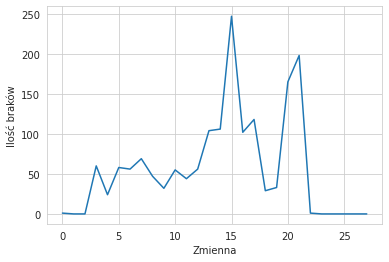

In [6]:
# braki danych wzorzec
braki = df_pi.isnull()
braki_series = braki.sum()

plt.plot(braki_series.index, braki_series)
plt.xlabel('Zmienna')
plt.ylabel('Ilość braków')
plt.show()

In [7]:
braki*1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0,0,0,1,0,0,0,1,0,0,0,0,1,1,1,1,1,0,0,0,1,1,0,0,0,0,0,0
296,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
297,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0
298,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'braki danych')

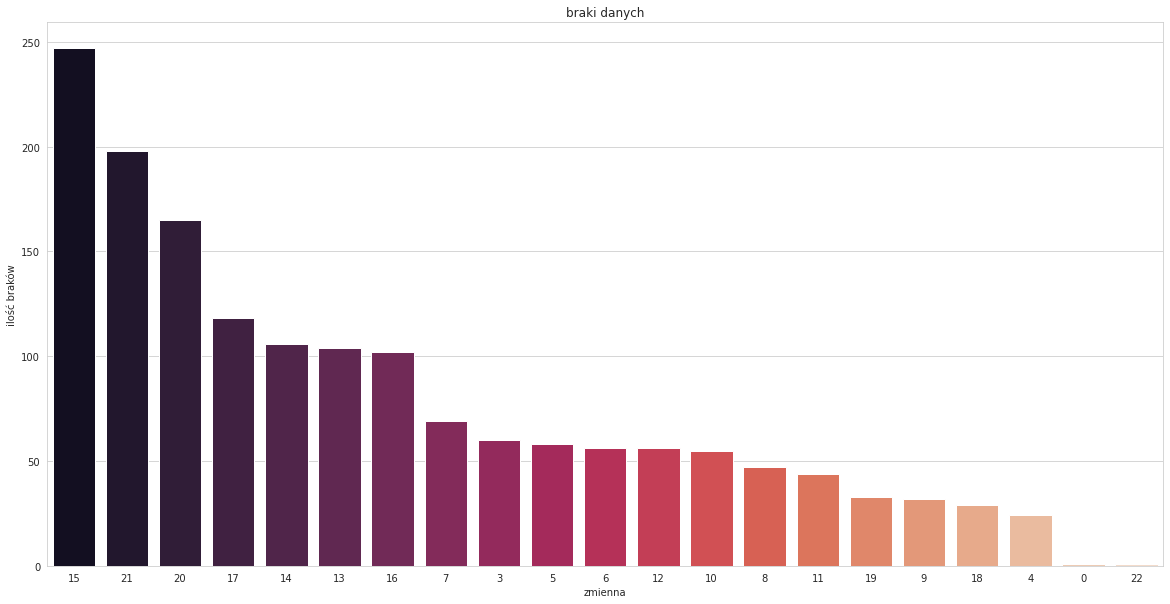

In [8]:
# braki danych po kolumnie
plt.figure(figsize=(20,10))
sns.barplot(x=braki_series.sort_values(ascending=False)[braki_series.sort_values(ascending=False)>0].index.astype('str'),
            y=braki_series.sort_values(ascending=False)[braki_series.sort_values(ascending=False)>0],
            order=braki_series.sort_values(ascending=False)[braki_series.sort_values(ascending=False)>0].index.astype('str'),
            palette='rocket')
plt.xlabel('zmienna')
plt.ylabel('ilość braków')
plt.title('braki danych')

Text(0.5, 1.0, 'zmienne z brakami <100 obserwacji')

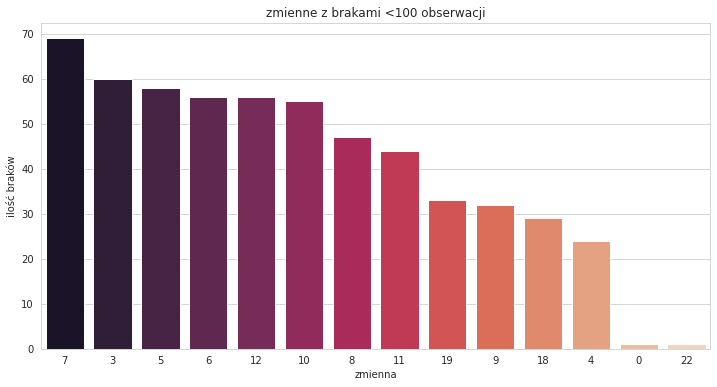

In [9]:
# braki danych 'imputowalne' (mniej 100 braków)
plt.figure(figsize=(12,6))
sns.barplot(x=braki_series.sort_values(ascending=False)
[(braki_series.sort_values(ascending=False)>0) & (braki_series.sort_values(ascending=False)<100)].index.astype('str'),
            y=braki_series.sort_values(ascending=False)
            [(braki_series.sort_values(ascending=False)>0) & (braki_series.sort_values(ascending=False)<100)],
            order=braki_series.sort_values(ascending=False)
            [(braki_series.sort_values(ascending=False)>0)
             & (braki_series.sort_values(ascending=False)<100)].index.astype('str'),
            palette='rocket')
plt.xlabel('zmienna')
plt.ylabel('ilość braków')
plt.title('zmienne z brakami <100 obserwacji')

In [10]:
# usunięcie zmiennych ze zbyt wieloma brakami
df = df.drop([15, 21, 20, 17, 14, 13, 16], axis=1)

In [11]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,18,19,22,23,24,25,26,27
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,5.0,4.0,4.0,45.0,8.4,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,3.0,4.0,2.0,50.0,85.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,3.0,3.0,1.0,33.0,6.7,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,2.0,4.0,4.0,48.0,7.2,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,NaN,NaN,NaN,74.0,7.4,2.0,2,4300,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,1,533886,NaN,120.0,70.0,4.0,NaN,4.0,2.0,2.0,4.0,NaN,55.0,65.0,3.0,2,3205,0,0,2
296,2.0,1,527702,37.2,72.0,24.0,3.0,2.0,4.0,2.0,4.0,3.0,3.0,44.0,NaN,3.0,1,2208,0,0,1
297,1.0,1,529386,37.5,72.0,30.0,4.0,3.0,4.0,1.0,4.0,4.0,3.0,60.0,6.8,2.0,1,3205,0,0,2
298,1.0,1,530612,36.5,100.0,24.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0,50.0,6.0,1.0,1,2208,0,0,1


count    271.000000
mean      46.295203
std       10.419335
min       23.000000
25%       38.000000
50%       45.000000
75%       52.000000
max       75.000000
Name: 18, dtype: float64

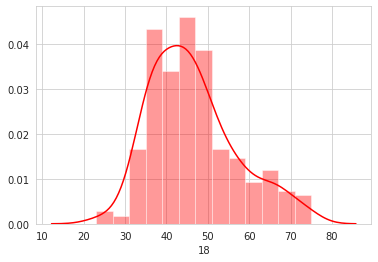

In [12]:
# imputacja zmiennej 18
# zmienna -> liczba czerwonych krwinek we krwi
# rozklad zmiennej
sns.distplot(df.loc[:,18], color='red')

# statystyki opisowe zmiennej przed imputacją
df.loc[:,18].describe()

In [13]:
# korelacje
df.corr().loc[:,18].sort_values(ascending=False)
# zmienna koreluje ze zmienna 8 (P=0,63) -> subiektynwa ocena koloru błony śluzowej

18    1.000000
8     0.633309
7     0.511055
9     0.489188
4     0.406090
11    0.400389
22    0.371962
6     0.360419
12    0.297236
10    0.209572
5     0.087098
3     0.065373
0    -0.042034
19   -0.054790
26   -0.066096
24   -0.068600
25   -0.077537
2    -0.093058
27   -0.097934
1    -0.147415
23   -0.171640
Name: 18, dtype: float64

aby dokonać imputacji regresją gdzie zmienną niezależną będzie zmienna 8, należy najpierw zaimputować zmienną 8, dokonamy tego metodą hot-deck, wartościami najbliższymi w wielowymiarowej przestrzeni

In [14]:
# imputacja wszystkich zmiennych poza zmienną 18 metodą hot-deck (K najblizszych sąsiadów)
imputer = KNNImputer(n_neighbors=3, weights='uniform')
df_knn_imputed = pd.DataFrame(imputer.fit_transform(df_pi))
df.loc[:,[7,3,5,6,12,10,8,11,19,9,4,0,22]] = df_knn_imputed.loc[:,[7,3,5,6,12,10,8,11,19,9,4,0,22]]

In [15]:
wartosc_bez_null = df[[8,18]][df[[8,18]].notnull()].dropna() # zapis zmiennych potrzebny do modelu regeresji (bez obserwacji brakujących)

In [16]:
# imputowanie brakow zmiennej 18 za pomoca regresji bez elementu stochastycznego
nulle = df[8][df[18].isnull()] # wartosc zmiennej 8 (tutaj egzogenicznej) do zaimputowania
model = LinearRegression()
model = model.fit(X=wartosc_bez_null[8].values.reshape(-1,1), y=wartosc_bez_null[18].values.reshape(-1,1))
yhat = model.predict(nulle.values.reshape(-1,1))
keys = list(df[8][df[18].isnull()].index)
values = list(yhat.flatten())
d = dict(zip(keys, values))
df[18].fillna(value=d, inplace=True)


count    300.000000
mean      46.391137
std       10.097519
min       23.000000
25%       38.869977
50%       45.000000
75%       52.000000
max       75.000000
Name: 18, dtype: float64

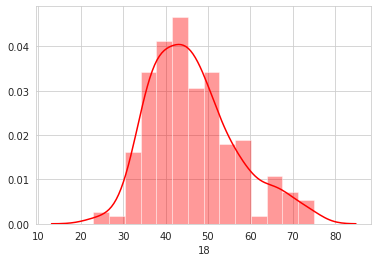

In [17]:
# rozklad zmiennej po imputacji
sns.distplot(df.loc[:,18], color='red')
# statystyki opisowe zmiennej po imputacji
df.loc[:,18].describe()

In [18]:
# niektóe ze zmiennych jakościowych zakodowanych jako np. [1,2,3] zostały zaimputowane jakie zmienne ciągłe np. 2.667, należy je zaokrąglić
df.head(50)

,0,1,2,3,4,5,6,7,8,9,10,11,12,18,19,22,23,24,25,26,27
0,2.0,1,530101,38.500000,66.000000,28.000000,3.000000,3.000000,3.000000,2.000000,5.000000,4.000000,4.000000,45.000000,8.400000,2.0,2,11300,0,0,2
1,1.0,1,534817,39.200000,88.000000,20.000000,2.333333,1.000000,4.000000,1.000000,3.000000,4.000000,2.000000,50.000000,85.000000,3.0,2,2208,0,0,2
2,2.0,1,530334,38.300000,40.000000,24.000000,1.000000,1.000000,3.000000,1.000000,3.000000,3.000000,1.000000,33.000000,6.700000,1.0,2,0,0,0,1
3,1.0,9,5290409,39.100000,164.000000,84.000000,4.000000,1.000000,6.000000,2.000000,2.000000,4.000000,4.000000,48.000000,7.200000,2.0,1,2208,0,0,1
4,2.0,1,530255,37.300000,104.000000,35.000000,3.000000,3.000000,6.000000,2.000000,3.666667,3.000000,3.000000,74.000000,7.400000,2.0,2,4300,0,0,2
5,2.0,1,528355,37.933333,49.333333,19.333333,2.000000,1.000000,3.000000,1.000000,2.000000,3.000000,2.000000,46.962080,7.633333,1.0,2,0,0,0,2
6,1.0,1,526802,37.900000,48.000000,16.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,3.000000,37.000000,7.000000,1.0,1,3124,0,0,2
7,1.0,1,529607,38.133333,60.000000,30.666667,3.000000,1.666667,3.333333,1.000000,2.666667,4.000000,2.000000,44.000000,8.300000,2.0,1,2208,0,0,2
8,2.0,1,530051,38.366667,80.000000,36.000000,3.000000,4.000000,3.000000,1.000000,4.000000,4.000000,4.000000,38.000000,6.200000,3.0,1,3205,0,0,2
9,2.0,9,5299629,38.300000,90.000000,42.000000,1.000000,3.000000,1.000000,1.000000,5.000000,3.000000,1.000000,40.000000,6.200000,1.0,2,0,0,0,1


In [25]:
df.iloc[:,6:13] = df.iloc[:,6:13].apply(np.around)

In [26]:
df.head(50)

,0,1,2,3,4,5,6,7,8,9,10,11,12,18,19,22,23,24,25,26,27
0,2.0,1,530101,38.500000,66.000000,28.000000,3.0,3.0,3.0,2.0,5.0,4.0,4.0,45.000000,8.400000,2.0,2,11300,0,0,2
1,1.0,1,534817,39.200000,88.000000,20.000000,2.0,1.0,4.0,1.0,3.0,4.0,2.0,50.000000,85.000000,3.0,2,2208,0,0,2
2,2.0,1,530334,38.300000,40.000000,24.000000,1.0,1.0,3.0,1.0,3.0,3.0,1.0,33.000000,6.700000,1.0,2,0,0,0,1
3,1.0,9,5290409,39.100000,164.000000,84.000000,4.0,1.0,6.0,2.0,2.0,4.0,4.0,48.000000,7.200000,2.0,1,2208,0,0,1
4,2.0,1,530255,37.300000,104.000000,35.000000,3.0,3.0,6.0,2.0,4.0,3.0,3.0,74.000000,7.400000,2.0,2,4300,0,0,2
5,2.0,1,528355,37.933333,49.333333,19.333333,2.0,1.0,3.0,1.0,2.0,3.0,2.0,46.962080,7.633333,1.0,2,0,0,0,2
6,1.0,1,526802,37.900000,48.000000,16.000000,1.0,1.0,1.0,1.0,3.0,3.0,3.0,37.000000,7.000000,1.0,1,3124,0,0,2
7,1.0,1,529607,38.133333,60.000000,30.666667,3.0,2.0,3.0,1.0,3.0,4.0,2.0,44.000000,8.300000,2.0,1,2208,0,0,2
8,2.0,1,530051,38.366667,80.000000,36.000000,3.0,4.0,3.0,1.0,4.0,4.0,4.0,38.000000,6.200000,3.0,1,3205,0,0,2
9,2.0,9,5299629,38.300000,90.000000,42.000000,1.0,3.0,1.0,1.0,5.0,3.0,1.0,40.000000,6.200000,1.0,2,0,0,0,1
